In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.datasets import mnist

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
only_zeroes = X_train[y_train == 0]

In [5]:
only_zeroes.shape

(5923, 28, 28)

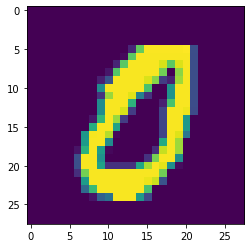

In [6]:
plt.imshow(only_zeroes[10])

In [7]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Reshape

In [8]:
np.random.seed(42)
tf.random.set_seed(42)

codings_size = 100

In [9]:
28 * 28

784

In [10]:
generator = Sequential()
generator.add(Dense(100, activation='relu', input_shape=[codings_size]))
generator.add(Dense(150, activation='relu'))
generator.add(Dense(784, activation='sigmoid')) # 28 * 28 = 784
generator.add(Reshape([28, 28]))

2022-04-27 16:43:12.325411: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [11]:
discriminator = Sequential()
discriminator.add(Flatten(input_shape=[28, 28]))
discriminator.add(Dense(150, activation='relu'))
discriminator.add(Dense(100, activation='relu'))
discriminator.add(Dense(1, activation='sigmoid'))

discriminator.compile(loss='binary_crossentropy', optimizer='adam')

In [12]:
GAN = Sequential([generator, discriminator])

In [13]:
discriminator.trainable = False

In [14]:
GAN.compile(loss='binary_crossentropy', optimizer='adam')

In [15]:
GAN.layers

In [16]:
GAN.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 28, 28)            143634    
                                                                 
 sequential_1 (Sequential)   (None, 1)                 132951    
                                                                 
Total params: 276,585
Trainable params: 143,634
Non-trainable params: 132,951
_________________________________________________________________


In [17]:
GAN.layers[0].summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               10100     
                                                                 
 dense_1 (Dense)             (None, 150)               15150     
                                                                 
 dense_2 (Dense)             (None, 784)               118384    
                                                                 
 reshape (Reshape)           (None, 28, 28)            0         
                                                                 
Total params: 143,634
Trainable params: 143,634
Non-trainable params: 0
_________________________________________________________________


In [18]:
GAN.layers[1].summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 150)               117750    
                                                                 
 dense_4 (Dense)             (None, 100)               15100     
                                                                 
 dense_5 (Dense)             (None, 1)                 101       
                                                                 
Total params: 132,951
Trainable params: 0
Non-trainable params: 132,951
_________________________________________________________________


In [19]:
import tensorflow as tf

In [20]:
batch_size = 32

In [21]:
my_data = only_zeroes

In [22]:
dataset = tf.data.Dataset.from_tensor_slices(my_data).shuffle(buffer_size=1000)

In [23]:
dataset = dataset.batch(batch_size, drop_remainder=True).prefetch(1)

In [24]:
generator, discriminator = GAN.layers
epochs = 1

for epoch in range(epochs):
    i = 0
    
    for X_batch in dataset:
        i += 1
        if i%100 == 0:
            print(f"Currently training on batch {i} of {len(my_data//batch_size)}")
        
        # Discriminator Training
        noise = tf.random.normal(shape=[batch_size, codings_size])
        gen_images = generator(noise)
        
        X_fake_vs_real = tf.concat([gen_images, tf.dtypes.cast(X_batch, tf.float32)], axis = 0)
        y1 = tf.constant([[0.]] * batch_size + [[1.]] * batch_size)
        
        discriminator.trainable = False
        discriminator.train_on_batch(X_fake_vs_real, y1)
        
        # Generator Training
        noise = tf.random.normal(shape=[batch_size, codings_size])
        y2 = tf.constant([[1.]] * batch_size)
        discriminator.trainable = False
        
        GAN.train_on_batch(noise, y2)
        
print("Training complete")

Currently training on batch 100 of 5923
Training complete


In [25]:
noise = tf.random.normal(shape=[10, 100])

In [26]:
noise.shape

TensorShape([10, 100])

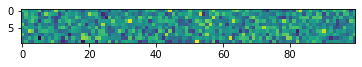

In [27]:
plt.imshow(noise)

In [28]:
image = generator(noise)

In [30]:
image.shape

TensorShape([10, 28, 28])

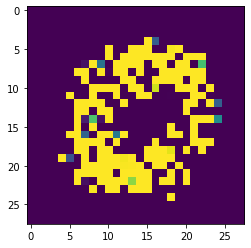

In [33]:
plt.imshow(image[9])